In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame(pd.read_csv('Titanic.csv'))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# df.isnull().sum() returns a pandas series with columns name as the label index
# and total count of null values in the column as it's value
# And we are storing only those columns which have more than 35% of the data missing.

drop_col = df.isnull().sum()[df.isnull().sum()>(35/100 * df.shape[0])]  

drop_col

Cabin    687
dtype: int64

In [6]:
drop_col.index

Index(['Cabin'], dtype='object')

In [7]:
df.drop(drop_col.index, axis=1, inplace=True)

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [9]:
df.fillna(df.mean(), inplace = True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [10]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [11]:
df['Embarked'].fillna('S',inplace=True)  

In [12]:
df.isnull().sum()          ## NOW ALL THE NULL  VALUES HAVE BEEN FILLED

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<AxesSubplot:>

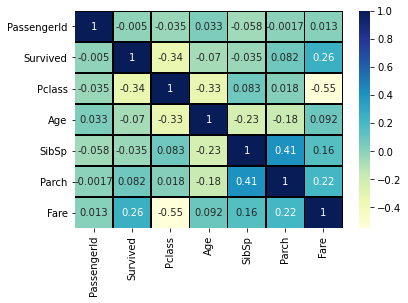

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(), annot = True, cmap="YlGnBu", linecolor='black', linewidths=0.5)

In [14]:
df['FamilySize'] = df['SibSp']+df['Parch']
df.drop(['SibSp', 'Parch'], axis=1, inplace=True)
df[['FamilySize', 'Survived']].corr()

,FamilySize,Survived
FamilySize,1.000000,0.016639
Survived,0.016639,1.000000


In [15]:
df['Alone'] = [0 if df['FamilySize'][i]>0 else 1 for i in df.index]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0,1


In [16]:
df.groupby(['Alone'])['Survived'].mean()


Alone
0    0.505650
1    0.303538
Name: Survived, dtype: float64

In [ ]:
If the person is alone he/she has less chance of surviving.

The reason might be the person who is traveling with his family might be belonging to rich class and might be prioritized 
over other.

In [17]:
df.groupby('Alone')['Fare'].mean()


Alone
0    48.832275
1    21.242689
Name: Fare, dtype: float64

So we can see the person travelling with their family have higher average ticket price. Means the person with family have 
high chances of belonging to a rich family.

In [18]:
df['Sex'] = [0 if df['Sex'][i]=='male' else 1 for i in df.index]  # 1 for female, 0 for male
df.groupby(['Sex'])['Survived'].mean()

Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64

In [19]:
df.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

C:\Users\Kanishka Pawar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


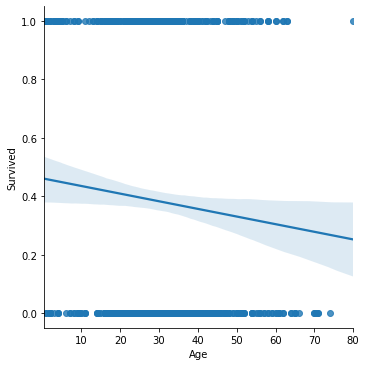

In [20]:
sns.lmplot('Age','Survived', data=df)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

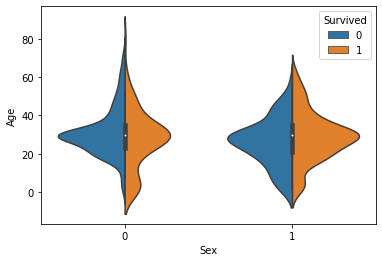

In [21]:
sns.violinplot(x='Sex',y='Age', hue='Survived', data=df, split=True)

C:\Users\Kanishka Pawar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


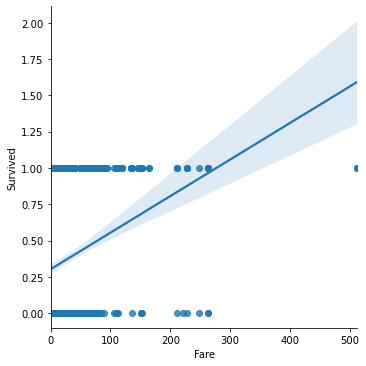

In [22]:
sns.lmplot('Fare','Survived', data=df)

# CONCLUSION
Female passengers were prioritized over men.
People with high class or rich people have higher survivl rate than others. The hierarichy might have been followed while saving the passangers.
Passengers travelling with their family have higher survival rate.
Passengers who borded the ship at Cherbourg, survived more in proportion then the others.

In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,S,0,1


In [24]:
df.drop(['Ticket', 'FamilySize', 'Name'], axis = 1, inplace=True)

In [25]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Alone
0,1,0,3,0,22.0,7.2500,S,0
1,2,1,1,1,38.0,71.2833,C,0
2,3,1,3,1,26.0,7.9250,S,1
3,4,1,1,1,35.0,53.1000,S,0
4,5,0,3,0,35.0,8.0500,S,1


In [27]:
new_df=pd.get_dummies(df, prefix_sep='_', columns=['Embarked']) #this will create dumies as shown below

In [28]:
new_df

,PassengerId,Survived,Pclass,Sex,Age,Fare,Alone,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0,22.000000,7.2500,0,0,0,1
1,2,1,1,1,38.000000,71.2833,0,1,0,0
2,3,1,3,1,26.000000,7.9250,1,0,0,1
3,4,1,1,1,35.000000,53.1000,0,0,0,1
4,5,0,3,0,35.000000,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000000,13.0000,1,0,0,1
887,888,1,1,1,19.000000,30.0000,1,0,0,1
888,889,0,3,1,29.699118,23.4500,0,0,0,1
889,890,1,1,0,26.000000,30.0000,1,1,0,0


In [29]:
new_df.drop('PassengerId',axis=1, inplace=True)

In [30]:
new_df.head()

,Survived,Pclass,Sex,Age,Fare,Alone,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,7.2500,0,0,0,1
1,1,1,1,38.0,71.2833,0,1,0,0
2,1,3,1,26.0,7.9250,1,0,0,1
3,1,1,1,35.0,53.1000,0,0,0,1
4,0,3,0,35.0,8.0500,1,0,0,1


In [31]:
## Splitting the tranformed data into test-train data

from sklearn.model_selection import train_test_split
X = new_df.drop('Survived', axis=1)
y = new_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)

In [32]:
## Fitting GaussianNB model on the  training set

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [33]:
## Predicting results for test dataset
y_pred=gnb.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.7649253731343284

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print(accuracy_score(y_pred,y_test))

0.8097014925373134


In [36]:
clf.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=1869390670),
 DecisionTreeClassifier(max_features='auto', random_state=1468201109),
 DecisionTreeClassifier(max_features='auto', random_state=830007184),
 DecisionTreeClassifier(max_features='auto', random_state=1205984591),
 DecisionTreeClassifier(max_features='auto', random_state=1911665131),
 DecisionTreeClassifier(max_features='auto', random_state=791884243),
 DecisionTreeClassifier(max_features='auto', random_state=1961136497),
 DecisionTreeClassifier(max_features='auto', random_state=1256886260),
 DecisionTreeClassifier(max_features='auto', random_state=2102305818),
 DecisionTreeClassifier(max_features='auto', random_state=535892465),
 DecisionTreeClassifier(max_features='auto', random_state=34572910),
 DecisionTreeClassifier(max_features='auto', random_state=1216656770),
 DecisionTreeClassifier(max_features='auto', random_state=1033402769),
 DecisionTreeClassifier(max_features='auto', random_state=598111607),
 DecisionTre

In [37]:
clf.feature_importances_

array([0.09477327, 0.24998145, 0.28825481, 0.30428267, 0.0250257 ,
       0.01375451, 0.0081017 , 0.01582588])

In [38]:
X_train.head()

,Pclass,Sex,Age,Fare,Alone,Embarked_C,Embarked_Q,Embarked_S
124,1,0,54.000000,77.2875,0,0,0,1
141,3,1,22.000000,7.7500,1,0,0,1
21,2,0,34.000000,13.0000,1,0,0,1
650,3,0,29.699118,7.8958,1,0,0,1
331,1,0,45.500000,28.5000,1,0,0,1


In [40]:
from sklearn.linear_model import LogisticRegression   #we can try various models
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print(accuracy_score(y_pred,y_test))

0.8097014925373134


C:\Users\Kanishka Pawar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
def models(clf,X_test,y_test,X_train,y_train):
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    print(accuracy_score(y_pred,y_test))

In [48]:
clf=LogisticRegression()
models(clf,X_test,y_test,X_train,y_train)

0.8097014925373134


C:\Users\Kanishka Pawar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
clf=RandomForestClassifier()
models(clf,X_test,y_test,X_train,y_train)

0.7985074626865671
